<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/week_2/Assignment_2_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: recommender System

In [1]:
#get data from GitHub -> https://github.com/keuperj/DATA
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 87, done.
remote: Total 87 (delta 0), reused 0 (delta 0), pack-reused 87
Unpacking objects: 100% (87/87), done.
Checking out files: 100% (61/61), done.


## Code from the lecture

In [2]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [3]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [4]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

In [5]:
%%time
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

CPU times: user 1min 56s, sys: 251 ms, total: 1min 56s
Wall time: 1min 56s


In [6]:
def getTopN(movie_id, D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [7]:
CII('Star',D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [8]:

D2=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D2[i,j]= np.linalg.norm(R[:,i]-R[:,j])


In [9]:

CII('Star', D2)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

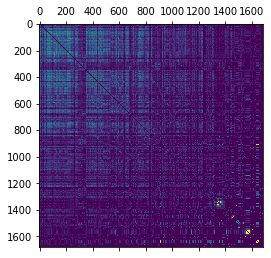

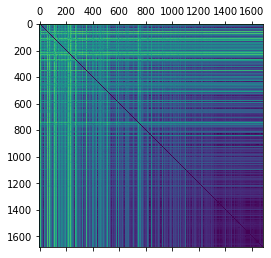

In [27]:
plt.matshow(D)
plt.matshow(D2)

## 4.2 Baseline Results
Implement and compare results of two very simple baseline methods 
* random recommendations: randomly recommend 5 movies (HINT user np.random sub-library to generate random movie IDs)
* always recommending the top 5 movies: HINT: need to find the IDs of the top 5 movies over all users first

In [10]:
print('------------------------------------------------------------\n5 random recomendations\n')
#generate 5 random recomendations
for k in range(5):
  #generate random numbers in range of the numbers of movies
  random_num = np.random.randint(np.shape(movies)[0])
  # print out the random numbers
  print('movie id = ',random_num)
  #get and print the movies from the generated ids
  name = getNameByID(random_num-1)
  print(name)
print('------------------------------------------------------------\n')


------------------------------------------------------------
5 random recomendations

movie id =  520
Great Escape, The (1963)
movie id =  1501
Prisoner of the Mountains (Kavkazsky Plennik) (1996)
movie id =  136
Mr. Smith Goes to Washington (1939)
movie id =  1035
Cool Runnings (1993)
movie id =  777
Castle Freak (1995)
------------------------------------------------------------



In [11]:
print('------------------------------------------------------------\n5 The top 5 movies are:\n')

#get the ids of the top movies

# get the mean value of each column
Mean = np.mean(D,axis=0)


for l in range(5):
  # get the position in the array of the best movie
  pos = np.where(Mean == np.amax(Mean))
  # set the rating of the best movie to 0 to find the second best
  Mean[pos[0]] = 0
  # get the movie name by the found movie ID
  TOPMov = getNameByID(pos[0][0])
  print(TOPMov)

print('------------------------------------------------------------')


------------------------------------------------------------
5 The top 5 movies are:

Back to the Future (1985)
Raiders of the Lost Ark (1981)
Empire Strikes Back, The (1980)
Pulp Fiction (1994)
Fugitive, The (1993)
------------------------------------------------------------


## 4.3 SVD
Implement the SVD approach using *Surprise* (see lab intro)
* compare the results


In [13]:
#cmd command to install new python packages
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 814 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630188 sha256=4a55533627b5f0e6a8838203ce269cd329a76bcea434b652b24c05a47bd1663c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [14]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [15]:
ratings=ratings[['movie_id',  'user_id','rating']]

In [16]:
ratings.head()

,movie_id,user_id,rating
0,242,196,3
1,302,186,3
2,377,22,1
3,51,244,2
4,346,166,1


In [17]:
# Load the movielens-100k dataset (download it if needed),
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings,reader)

In [18]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

In [19]:
# We'll use the famous SVD algorithm.
algo = SVD()

In [20]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [21]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9394


0.939444568247779